In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import pickle

sys.path.append("..")
from dm21cm.dm_params import DMParams

sys.path.append(os.environ['DH_DIR'])
from darkhistory.main import evolve as evolve_DH
from darkhistory.config import load_data

In [2]:
tf_version = 'zf01'

load_data('dep_tf', prefix=f"{os.environ['DH_DATA_DIR']}/../DHdata_v1_1_{tf_version}")
load_data('ics_tf', prefix=f"{os.environ['DH_DATA_DIR']}/../DHdata_v1_1_{tf_version}");

****** Loading transfer functions... ******
Using data at /n/holyscratch01/iaifi_lab/yitians/darkhistory/DHdata_v1_1/../DHdata_v1_1_zf01
    for propagating photons...   Done!
    for low-energy photons...  Done!
    for low-energy electrons...  Done!
    for high-energy deposition...  Done!
    for total upscattered CMB energy rate...  Done!
****** Loading complete! ******
****** Loading transfer functions... ******
    for inverse Compton (Thomson)...  Done!
    for inverse Compton (relativistic)...  Done!
    for inverse Compton (energy loss)...  Done!
****** Loading complete! ******


In [3]:
# phph
dm_params = DMParams(
    mode = 'decay',
    primary = 'phot_delta',
    m_DM = 1e8, # [eV]
    lifetime = 1e25, #[s]
)

In [4]:
# ee
dm_params = DMParams(
    mode = 'decay',
    primary = 'elec_delta',
    m_DM = 1e8, # [eV]
    lifetime = 1e26, #[s]
)

In [3]:
# off
dm_params = DMParams(
    mode = 'decay',
    primary = 'phot_delta',
    m_DM = 1e8, # [eV]
    lifetime = 1e50, #[s]
)

In [ ]:
run_name = 'test'
tf_version = 'zf01'

soln = evolve_DH(
    DM_process=dm_params.mode, mDM=dm_params.m_DM,
    primary=dm_params.primary,
    sigmav=dm_params.sigmav, lifetime=dm_params.lifetime,
    struct_boost=dm_params.struct_boost,
    start_rs=3000, end_rs=4.+1, coarsen_factor=12, verbose=1,
    # use fake reionization to get case-A recomb. coeff.
    reion_switch=True, reion_rs=47.,
    photoion_rate_func=[lambda x: 0., lambda x: 0., lambda x: 0.],
    photoheat_rate_func=[lambda x: 0., lambda x: 0., lambda x: 0.],
    
    cross_check_21cmfast=True,
    cross_check_21cmfast_tf_version=tf_version,
    debug_inject_ST_xray=True,
)

pickle.dump(soln, open(f"{os.environ['DM21CM_DIR']}/outputs/dh/{run_name}_soln.p", 'wb'))

In [3]:
soln = pickle.load(open(f"{os.environ['DM21CM_DIR']}/outputs/dh/test_soln.p", 'rb'))

In [5]:
import darkhistory.physics as phys
import matplotlib.pyplot as plt

[None, None]

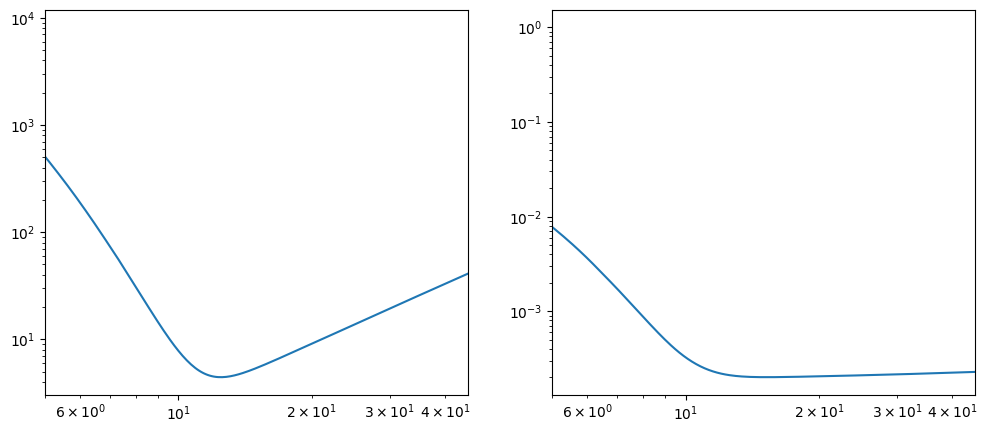

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
ax = axs[0]
ax.plot(soln['rs']-1, soln['Tm']/phys.kB, label='DH')
ax.set(xlim=(5, 45))
ax.set(xscale='log', yscale='log')

ax = axs[1]
ax.plot(soln['rs']-1, soln['x'][:, 0], label='DH')
ax.set(xlim=(5, 45))
ax.set(xscale='log', yscale='log')

In [10]:
import numpy as np
np.argmin(np.abs(soln['rs']-6))

554

In [11]:

soln['Tm'][554]/phys.kB

508.81656233425804